In [1]:
import time
import numpy as np
from numpy import linalg as la
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [115]:
''' ICA
n = number of original signals
m = number of mixed signals
t = length of one signal

INPUTS:
X = mixed signal (m,t)
W = initial unmixing matrix (n,m)
ETA = learning rate
MAX_ITER = max number of iterations

OUTPUT:
W = converged unmixing matrix (n,m)
'''
def ICA(X, W, ETA=0.000001, MAX_ITER=1000):

    n,m = W.shape
    m,t = X.shape
    
    print(f'Running ICA...')
    print(f'eta={ETA} and R_max={MAX_ITER}')
    
    start_time = time.time()
    for i in range(0, int(MAX_ITER)):
        # Estimate of U
        Y = W@X         # (n,t)

        # find delW
        Z = 1/(1 + np.exp(-Y))   # (n,t)
        delW = ETA*((np.identity(n)*t + (1 - 2*Z)@Y.T) @W)
        
        # update W
        W += delW
    end_time = round(time.time() - start_time, 4)
    print(f'Completed ICA in {end_time} sec')
    
    return W

''' plots
INPUTS:
A = np.array (#,t) of signals (mixed or unmixed)
n = number of signals to plot

OUTPUT:
plot

'''

COLOR = ['b','g','r','c','k']
def plots(A, spacing=None, title=None):   
    
    n,_ = A.shape
    Anorm = norm(A,spacing)
    
    fig = plt.figure(figsize=(16,8))
    ax = plt.gca()
    for i in range(0,n):
        plt.plot(Anorm[i][:40], COLOR[i])
        vis = False if i < n-1 else True
        ax.axes.xaxis.set_visible(vis)
    
    if title: ax.set_title = title
        
    plt.show()
    
''' norm
normalizes input signals so they can be plotted neatly

INPUTS:
A = np.array (#,t) of signals (mixed or unmixed)
spacing = distance between each signal on the plot (experimentally find)
'''
def norm(A,spacing):
    Anorm = []
    
    mi = min(map(min, A))
    ma = max(map(max, A))
    
    s = spacing if spacing is not None else 0
    
    for i in range(len(A)):
        Anorm.append(s*i + (A[i]-mi) / (ma-mi))
        
    return Anorm

''' correlation coefficient
found from: https://stackoverflow.com/questions/40905389/in-python-how-do-we-find-the-correlation-coefficient-between-two-matrices

INPUTS:
T1, T2 - two matricies

OUTPUT:
pearson correlation coefficient
'''
def correlation_coefficient(T1, T2):
    numerator = np.mean((T1 - T1.mean()) * (T2 - T2.mean()))
    denominator = T1.std() * T2.std()
    if denominator == 0:
        return 0
    else:
        result = numerator / denominator
        return result

# Producing Plots

In [170]:
np.random.seed(8)

# Load data
data = loadmat('sounds.mat')['sounds']

U = data[:3][:]
n,t = U.shape
m = n

# Mix signals and create W_init
A = np.random.rand(m,n)
X = A@U
# print(A)
# print('...mixing matrix\n')

W_init = np.random.rand(n,m)
# print(W_init.shape)
# print('...initial W\n')

W = ICA(X, W_init, ETA=0.0000001, MAX_ITER=1000)
# print(W.shape)
# print('...final W\n')

rec = W@X

Running ICA...
eta=1e-07 and R_max=1000
Completed ICA in 3.5029 sec


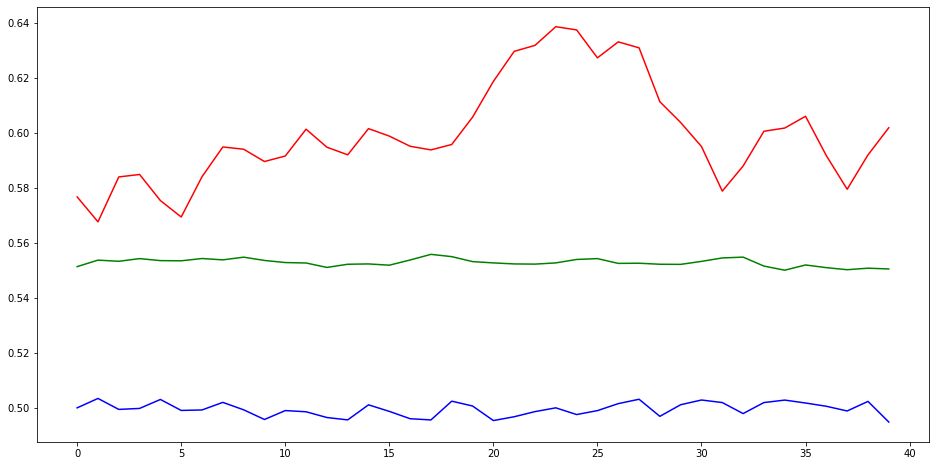

In [171]:
plots(U,0.05)

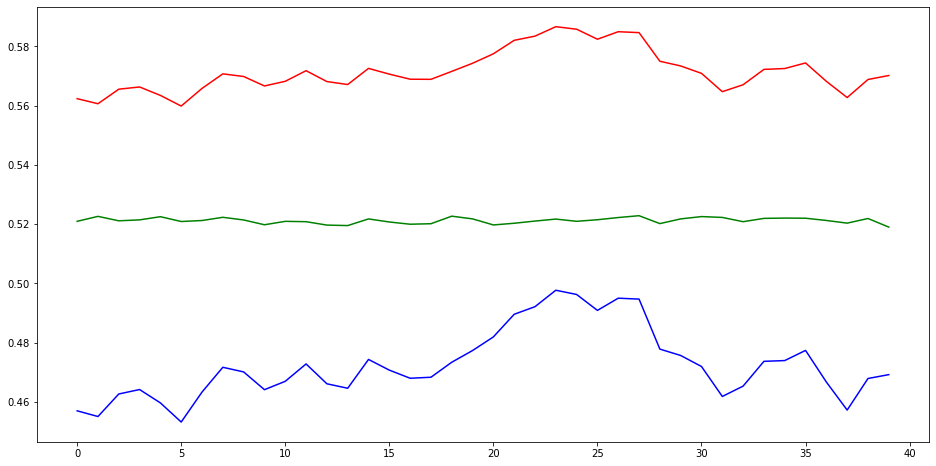

In [165]:
plots(X, 0.05)

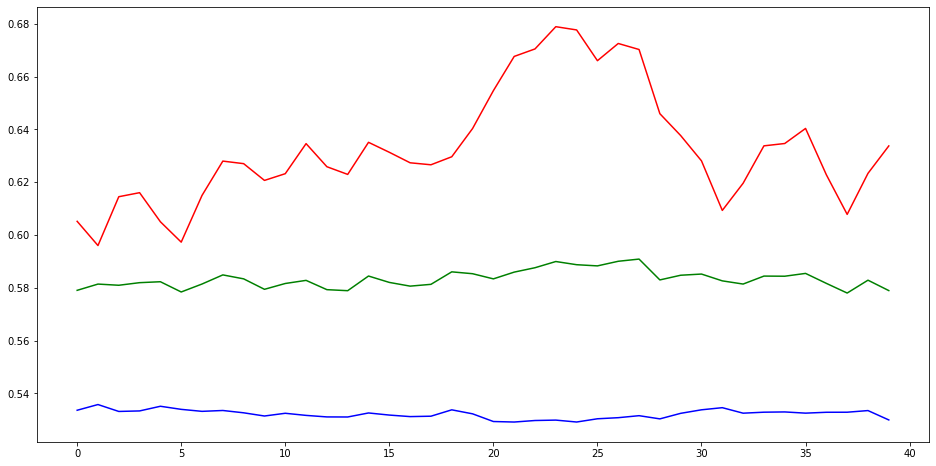

In [172]:
r = np.array([rec[1],rec[0],rec[2]])
plots(rec, 0.05)

In [173]:
c = correlation_coefficient(U,r)
print(round(c,4))

0.7349


# Optimizing on sounds.mat

In [138]:
# Load all data
U = loadmat('sounds.mat')['sounds']
n,t = U.shape

results = []

eta_trials = [0.00001, 0.000001]
m_trials = np.array([1, 5, 10]) * n
R_max_trials = np.array([1000])

for eta in eta_trials:
    for m in m_trials:
        for R_max in R_max_trials: 
            np.random.seed(8)
            print(f'm={m}')

            A = np.random.rand(m,n)
            W_init = np.random.rand(n,m)

            X = A@U
            W = ICA(X, W_init, ETA=eta, MAX_ITER=R_max)

            rec = W@X
            results.append(rec)

            error = la.norm(rec-U,2)
            print(f'Error: {error}\n')

m=5
Running ICA...
eta=1e-05 and R_max=1000
Completed ICA in 5.8437 sec
Error: 500.963665545716

m=25
Running ICA...
eta=1e-05 and R_max=1000
Completed ICA in 6.2974 sec
Error: 538.7386446495229

m=50
Running ICA...
eta=1e-05 and R_max=1000


<ipython-input-106-2054fe4e3202>:21: RuntimeWarning: overflow encountered in exp
  Z = 1/(1 + np.exp(-Y))   # (n,t)
<ipython-input-106-2054fe4e3202>:22: RuntimeWarning: overflow encountered in matmul
  delW = ETA*((np.identity(n)*t + (1 - 2*Z)@Y.T) @W)
<ipython-input-106-2054fe4e3202>:18: RuntimeWarning: invalid value encountered in matmul
  Y = W@X         # (n,t)


Completed ICA in 5.1671 sec
Error: nan

m=5
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.5447 sec
Error: 500.9636671522634

m=25
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 6.1862 sec
Error: 527.8287636009237

m=50
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 6.9383 sec
Error: 520.3742382197083



In [136]:
# R_max test
n = 5
m = 5
U = data[:n,:]

R_max_TEST_results = []

R_max_trials = np.array([1000, 10000, 100000])
for R_max in R_max_trials:
    np.random.seed(8)
    
    A = np.random.rand(m,n)
    W_init = np.random.rand(n,m)
    
    X = A@U
    W = ICA(X, W_init, ETA=0.000001, MAX_ITER=R_max)
    
    rec = W@X
    R_max_TEST_results.append(rec)
    
    error = la.norm(rec-U,2)
    print(f'Error: {error}\n')

Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.6485 sec
Error: 500.9636671522634

Running ICA...
eta=1e-06 and R_max=10000
Completed ICA in 56.9701 sec
Error: 500.9636655455961

Running ICA...
eta=1e-06 and R_max=100000
Completed ICA in 559.7408 sec
Error: 500.96366554578697



In [144]:
# m test
np.random.seed(8)

n = 5
U = data[:n,:]

m_TEST_results = []
m_TEST_errors = []

for m in range(n,21):
    print(f'm={m}')

    A = np.random.rand(m,n)
    W_init = np.random.rand(n,m)

    X = A@U
    W = ICA(X, W_init, ETA=0.000001, MAX_ITER=1000)

    rec = W@X
    m_TEST_results.append(rec)

    error = la.norm(rec-U,2)
    m_TEST_errors.append(error)
    print(f'Error: {error}\n')

m=5
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.6239 sec
Error: 500.9636671522634

m=6
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.4285 sec
Error: 522.8581270576149

m=7
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.6194 sec
Error: 525.4833959454768

m=8
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.5681 sec
Error: 521.3232007340547

m=9
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.7562 sec
Error: 524.0239915187126

m=10
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.5882 sec
Error: 500.9564203065253

m=11
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.7674 sec
Error: 538.7433056068348

m=12
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.6837 sec
Error: 522.6530456794972

m=13
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.6899 sec
Error: 525.38078924904

m=14
Running ICA...
eta=1e-06 and R_max=1000
Completed ICA in 5.8497 sec
Error: 522.0341079588661

m=15
Running ICA.

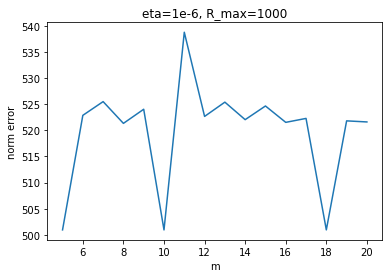

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(5,21), m_TEST_errors)
ax.set_title('eta=1e-6, R_max=1000')
ax.set_xlabel('m')
ax.set_ylabel('norm error')

plt.show()

Observations: 

    Eta values 0.00001 and larger seem to overflow at relatively small R_max values (~1000).
    So an eta value of 1e-6 will be chosen.
    
    R_max values - 1e3, 1e4, 1e5 - result in the same error value.
    Since smaller R_max values take less time (5sec, 60sec, 300sec respectively), an R_max of 1000 will be chosen.
    
    There is no distinguishable pattern as to what the best m value is for a given mixed signal.
    So an m value of n will be chosen, because on average, it produces a lower error.

# Testing on icaTest.mat

In [33]:
np.random.seed(8)

# Import data
U = loadmat('icaTest.mat')['U']
A = loadmat('icaTest.mat')['A']
print(U.shape)
print(A.shape)

m,n = A.shape

# Mix original data (U)
X = A@U

# ICA
W_init = np.random.rand(n,m)
W = ICA(X, W_init, ETA=0.01, MAX_ITER=1000000)

# Reconstruct data (rec)
rec = W@X

error = la.norm(rec-U,2)
print(f'Error: {error}\n')

(3, 40)
(3, 3)
Running ICA...
eta=0.01 and R_max=1000000
Completed ICA in 26.2249 sec
Error: 12.440088291067473



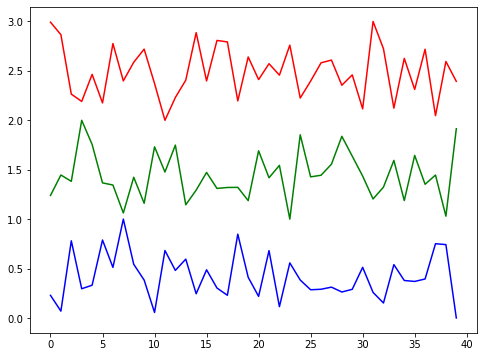

In [37]:
plots(U, 1)

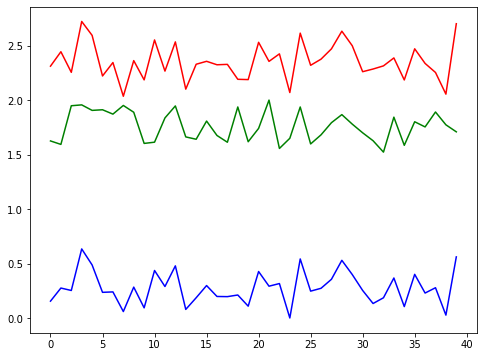

In [38]:
plots(X, 1)

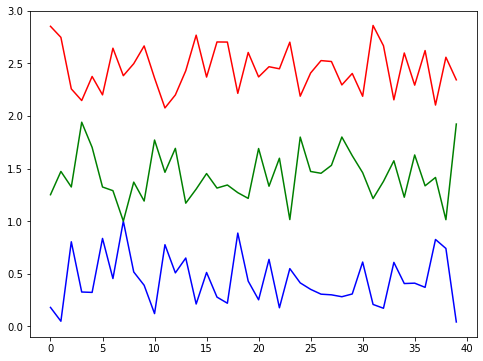

In [64]:
r = np.array([rec[0],rec[2],-rec[1]])
plots(r, 1)

In [82]:
c = correlation_coefficient(U,r)
print(round(c,4))

0.9796
